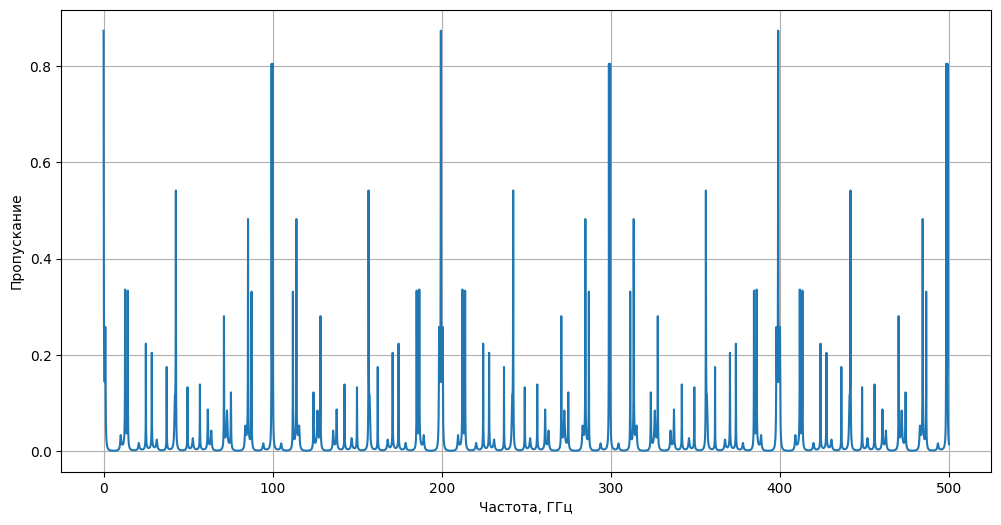

In [9]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1.0, 5*10e10, 1000000 )

k1 = k2 = 0.27
k3 = k4 = 0.03
l = 19.57e-3
L = 16.48e-3
S = 14.42e-3
n = 1.46
c = 3e8
q = 0.9988
N = 19
M = 16
O = 14
T1 = n*l/c
T2 = n*L/c
T3 = n*S/c
α = 0.1
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
γ3 = np.exp(-α * S)

C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
C4 = np.sqrt(1-k4)

def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (q**4*np.sqrt(z**(-(N+M+O))*k1*k2*k3*k4*γ1*γ2*γ3))/(1 - q**2*C1*C2*γ1*z**(-N) - q**2*C2*C3*γ2*z**(-M) - q**2*C3*C4*γ3*z**(-O) + q**2*C1*C3*γ1*γ2*z**(-(N+M)) + q**2*C2*C4*γ2*γ3*z**(-(M+O)) + q**4*C1*C2*C3*C4*γ1*γ3*z**(-(N+O)) - q**2*C1*C4*γ1*γ2*γ3*z**(-(N+M+O)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))
plt.figure(figsize=(12, 6))
plt.plot(freq/1e9, T_values)
#plt.xlim(100e6, 500e6)
plt.xlabel('Частота, ГГц')
plt.ylabel('Пропускание')
#plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()